In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import scipy.io


import plotly.express as px
import matplotlib.pyplot as plt

xls = pd.ExcelFile('cc_spectral_signature.xlsx')
print(xls.sheet_names)

df = pd.read_excel(io='cc_spectral_signature.xlsx', sheet_name='Average Spectra')
del df['Unnamed: 0']
display(df.describe())

df = df.apply(func=lambda e: (e - np.min(e)) / (np.max(e) - np.min(e)), axis=0)
display(df.describe())


['Average Spectra', 'Standard dev Spectra', 'full spectra data', 'spectra plots', 'band wavelengths']


,clover,canola,triticale,vetch,soil
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,0.086500,0.057955,0.052985,0.074149,0.037951
std,0.076574,0.043307,0.040868,0.062228,0.018453
min,0.005875,0.008563,0.005454,0.006965,0.010010
25%,0.011164,0.016803,0.014999,0.013652,0.023393
50%,0.031468,0.030393,0.026042,0.029559,0.033224
75%,0.170982,0.107055,0.098353,0.142131,0.055876
max,0.229851,0.128893,0.131124,0.196383,0.084124


,clover,canola,triticale,vetch,soil
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,0.359972,0.410472,0.378222,0.354688,0.376994
std,0.341887,0.359899,0.325205,0.328524,0.248980
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.023616,0.068479,0.075953,0.035302,0.180570
50%,0.114266,0.181424,0.163822,0.119278,0.313224
75%,0.737165,0.818516,0.739234,0.713586,0.618855
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [2]:
fig = px.line(data_frame=df)
fig

abundances/abundances_gaussianfields_spheric_5em_16x16_001.mat


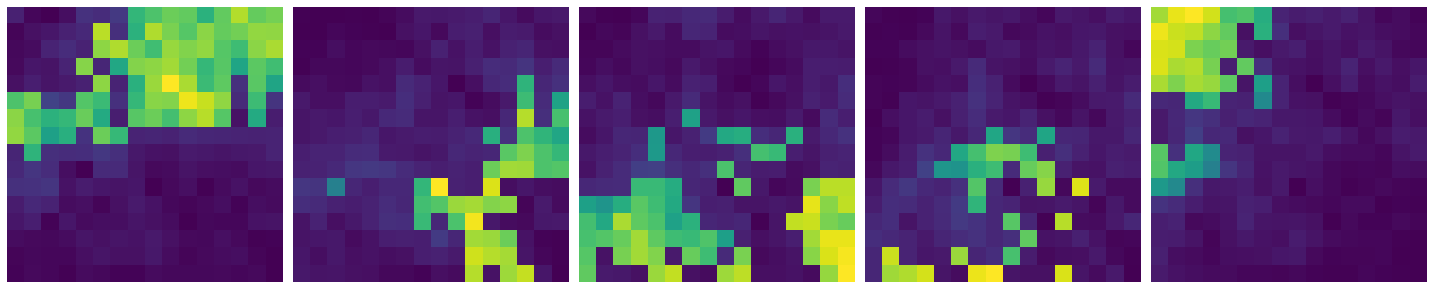

 82%|████████▏ | 221/270 [01:10<00:13,  3.56it/s]

In [3]:
from hsi_datasets import plot_datacube_image
from hsi_datasets import datacube_generator

endmembers = df.values.T


for seq in range(0,10):    
    file_name = f"abundances/abundances_gaussianfields_spheric_5em_16x16_{(seq+1):03}.mat"
    print(file_name)
    matfile = scipy.io.loadmat(file_name)    
    abundances = matfile['abundances']

    fig, axs = plt.subplots(1,5, figsize=(20,10))
    for endmember_num in range(0,5):
        axs[endmember_num].imshow(abundances[...,endmember_num])        
        axs[endmember_num].set_axis_off()    
    plt.tight_layout()
    plt.show()

    # -------
    
    results = datacube_generator(endmembers_names=list(df.columns), endmembers_spectra=endmembers, abundances_tensor=abundances)
    datacube, abundances_tensor, endmembers_spectra, endmembers_names = results

    outputfile = "datacube_{seq:03}.png"
    fig = plot_datacube_image(
        datacube=datacube, 
        outputfile=outputfile, 
        showfigure=True, 
        reduce_factors=(1,1,1)
    )